In [1]:
library(googlesheets4)
library(ggplot2)
library(ggbeeswarm)
library(glue)

Warning message:
"package 'ggbeeswarm' was built under R version 4.0.5"


In [2]:
ctrl_df <- read.csv("Z:/paper_data/2021_cristae/data_507_lamellar_angle/angles_ctrl.csv")
kd_df <- read.csv("Z:/paper_data/2021_cristae/data_507_lamellar_angle/angles_opa1.csv")

all_data <- rbind(ctrl_df, kd_df)

In [3]:
nonzero_all_data <- all_data[!is.na(all_data$angles), ]

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_tex

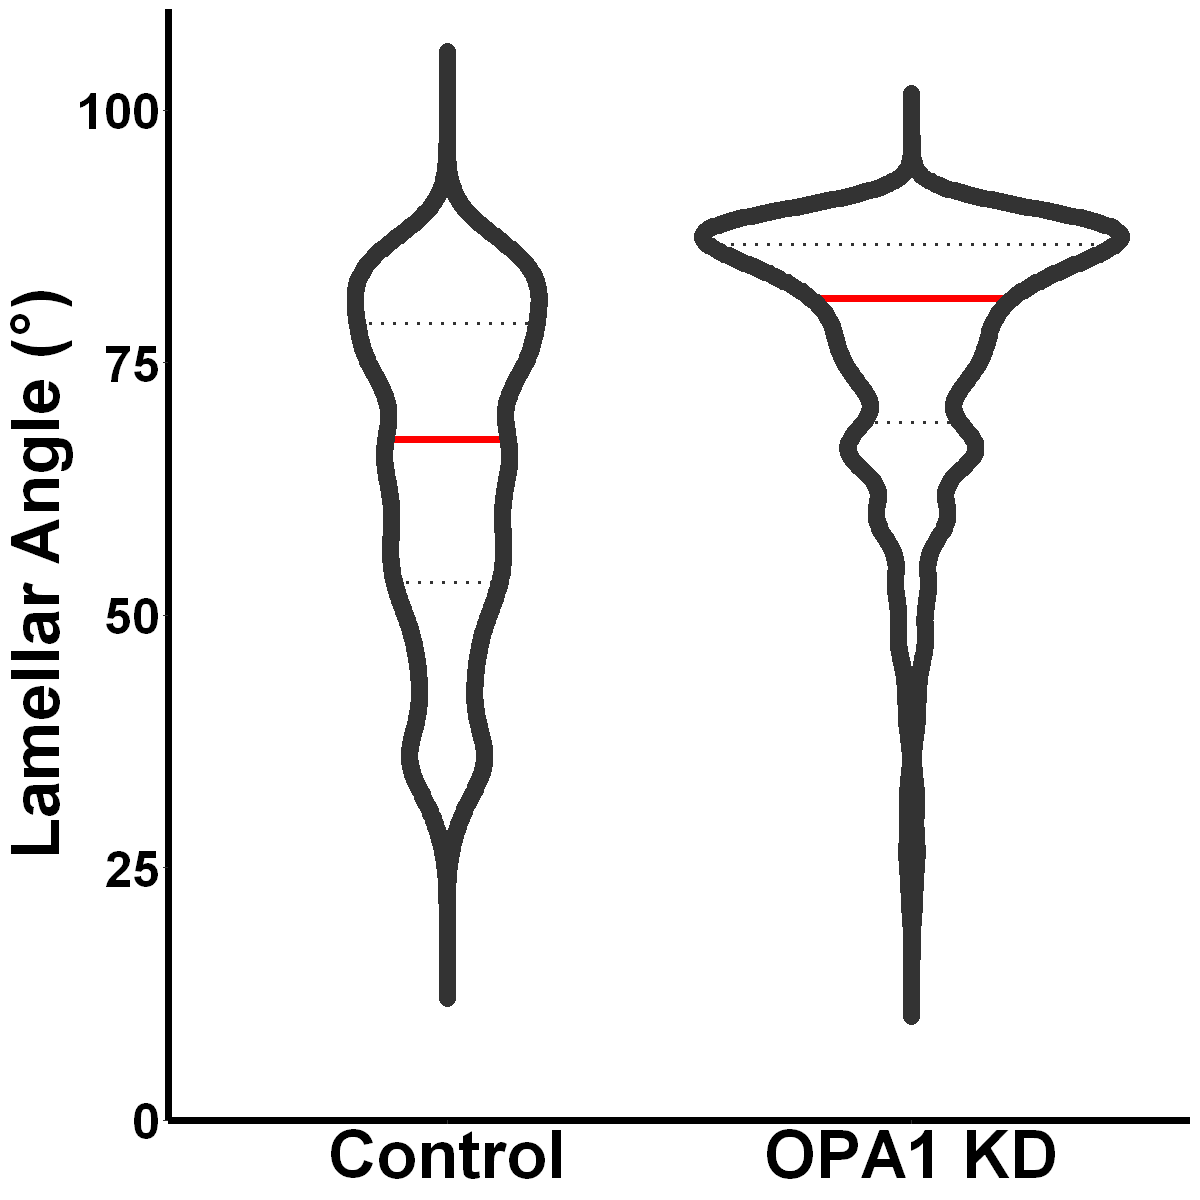

In [4]:
options(repr.plot.width=10, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0, 110)
)

graph <- graph + labs(
    y = "Lamellar Angle (°) "
) + geom_violin(
    data = nonzero_all_data,
    aes(gene, angles),
    linetype = "dotted",
    size = 1,
    adjust = 0.5,
    trim=FALSE,
    draw_quantiles = c(0.25, 0.75),
    fill="transparent"
) + geom_violin(
    data = nonzero_all_data,
    aes(gene, angles),
    size = 2,
    adjust = 0.5,
    trim=FALSE,
    draw_quantiles = c(0.5),
    color="red",
    fill="transparent"
) + geom_violin(
    data = nonzero_all_data,
    aes(gene, angles),
    size = 5,
    adjust = 0.5,
    trim=FALSE,
    fill="transparent"
) + scale_x_discrete(
    labels = c("Control", "OPA1 KD"),
)

graph

In [5]:
wilcox.test(
    nonzero_all_data[nonzero_all_data$gene == "shCtrl", ]$`angles`, 
    nonzero_all_data[nonzero_all_data$gene == "shOPA1", ]$`angles`
)


	Wilcoxon rank sum test with continuity correction

data:  nonzero_all_data[nonzero_all_data$gene == "shCtrl", ]$angles and nonzero_all_data[nonzero_all_data$gene == "shOPA1", ]$angles
W = 8239, p-value = 4.313e-13
alternative hypothesis: true location shift is not equal to 0


In [6]:
dir.create("Z:/paper_data/2021_cristae/for_revision_#2/fig7B")
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/fig7B/plot.svg", plot = graph, dpi = 100, width = 10, height = 10)


Warning message in dir.create("Z:/paper_data/2021_cristae/for_revision_#2/fig7B"):
" 'Z:\paper_data\2021_cristae\for_revision_#2\fig7B' はすでに存在します "
